In [9]:
import tweepy as tw
import config_twitter

In [10]:
auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
auth.set_access_token(config_twitter.access_token,config_twitter.access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [11]:
user = api.verify_credentials()
user

User(_api=<tweepy.api.API object at 0x000002642D55AEB0>, _json={'id': 1415034447515328522, 'id_str': '1415034447515328522', 'name': 'Valentina', 'screen_name': 'Valenti_Hult', 'location': '', 'description': 'International Business student\nAugust 2021', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 2, 'listed_count': 0, 'created_at': 'Tue Jul 13 19:44:43 +0000 2021', 'favourites_count': 2, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1, 'lang': None, 'status': {'created_at': 'Fri Jul 16 12:05:44 +0000 2021', 'id': 1416006130816462849, 'id_str': '1416006130816462849', 'text': 'RT @benthecoder1: 🆕 Sentiment Analysis on Reddit Tech News with Python 🆕\n\nRead my latest⚡ article about sentiment analyis using Python libr…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'benthecoder1', 'name': 'Benedict Neo', 'id': 111946

In [12]:
import json
import tweepy as tw
import config_twitter

In [13]:
def connect_api():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

In [14]:
api = connect_api()

Connected to Twitter API as Valentina


In [15]:
# let's see what people think of smartwatches
query = 'smartwatch OR \"smart watch\" -filter:retweets'
ntweets = 1000

In [16]:
tweets = [tweet._json for tweet in tw.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(ntweets)]
len(tweets)

1000

In [17]:
file_out = f"watch_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [18]:
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
fjson = 'watch_tweet_data_1000.json'

In [20]:
with open(fjson) as file:
    data = json.load(file)
len(data)

1000

In [21]:
#check data
data[5]

{'created_at': 'Tue Jul 20 19:00:39 +0000 2021',
 'id': 1417560098797408257,
 'id_str': '1417560098797408257',
 'full_text': "Buy an oraimo Tempo-W2 Smartwatch from @PlentyGadgets.\n\nWaterproof\nLarge 1.28'' HD color Touchscreen\nReal-Time texts, calls, app alerts Notifications\nActivity &amp; Sleep Tracking: Heart rate, Steps, Distance, Calories etc to help you understand your overall physical health.\n&gt; https://t.co/FrPzMEjqzu",
 'truncated': False,
 'display_text_range': [0, 280],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'PlentyGadgets',
    'name': 'Plenty Gadgets',
    'id': 988605821931196417,
    'id_str': '988605821931196417',
    'indices': [39, 53]}],
  'urls': [],
  'media': [{'id': 1417560093416112130,
    'id_str': '1417560093416112130',
    'indices': [281, 304],
    'media_url': 'http://pbs.twimg.com/media/E6wvZPfWQAIl9iK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/E6wvZPfWQAIl9iK.jpg',
    'url': 'https://t.co/

In [22]:
# pandas DF
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets


,text
0,Sports Smart Watch with Heart Rate Monitor#spa...
1,New Smart Watch available with Ear Pods at aff...
2,Bluetooth Waterproof Smart Watch (Andriod &amp...
3,Yes. Smart watch my foot 😩 https://t.co/uOh2fv...
4,Yo! Anybody wanna buy me that @TAGHeuer @Ninte...
...,...
995,I love Saskia Watch Face Samsung Gear #galaxyw...
996,How cool this towel!! You can play the @zombie...
997,More reason to buy a smart watch https://t.co/...
998,"#EbixCash congratulates Aditya Jaiswal, our 2n..."


In [23]:
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['username'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,username
0,Sports Smart Watch with Heart Rate Monitor#spa...,0,0,smartstyleshop2
1,New Smart Watch available with Ear Pods at aff...,0,0,abdoullmuhd
2,Bluetooth Waterproof Smart Watch (Andriod &amp...,0,0,tophitfit
3,Yes. Smart watch my foot 😩 https://t.co/uOh2fv...,0,0,Zoeinc_
4,Yo! Anybody wanna buy me that @TAGHeuer @Ninte...,0,0,CSnackson
...,...,...,...,...
995,I love Saskia Watch Face Samsung Gear #galaxyw...,0,0,nieuwsonlinenu
996,How cool this towel!! You can play the @zombie...,0,0,DbStadia
997,More reason to buy a smart watch https://t.co/...,0,0,wajdisalihin86
998,"#EbixCash congratulates Aditya Jaiswal, our 2n...",0,2,EBIXCASH_WM


In [24]:
# text cleaning function
stop_words = set(stopwords.words('english'))
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [25]:
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,username,text_clean
0,Sports Smart Watch with Heart Rate Monitor#spa...,0,0,smartstyleshop2,sports smart watch heart rate monitor sparkle ...
1,New Smart Watch available with Ear Pods at aff...,0,0,abdoullmuhd,new smart watch available ear pods affordable ...
2,Bluetooth Waterproof Smart Watch (Andriod &amp...,0,0,tophitfit,bluetooth waterproof smart watch andriod ios f...
3,Yes. Smart watch my foot 😩 https://t.co/uOh2fv...,0,0,Zoeinc_,yes smart watch foot
4,Yo! Anybody wanna buy me that @TAGHeuer @Ninte...,0,0,CSnackson,yo anybody wan na buy tagheuer nintendoamerica...
...,...,...,...,...,...
995,I love Saskia Watch Face Samsung Gear #galaxyw...,0,0,nieuwsonlinenu,love saskia watch face samsung gear galaxywatc...
996,How cool this towel!! You can play the @zombie...,0,0,DbStadia,cool towel play zombiearmy beach stadia phone ...
997,More reason to buy a smart watch https://t.co/...,0,0,wajdisalihin86,reason buy smart watch
998,"#EbixCash congratulates Aditya Jaiswal, our 2n...",0,2,EBIXCASH_WM,ebixcash congratulates aditya jaiswal 2nd week...


In [26]:
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,username,text_clean,polarity,subjectivity
0,Sports Smart Watch with Heart Rate Monitor#spa...,0,0,smartstyleshop2,sports smart watch heart rate monitor sparkle ...,0.214286,0.642857
1,New Smart Watch available with Ear Pods at aff...,0,0,abdoullmuhd,new smart watch available ear pods affordable ...,0.241234,0.535065
2,Bluetooth Waterproof Smart Watch (Andriod &amp...,0,0,tophitfit,bluetooth waterproof smart watch andriod ios f...,0.307143,0.721429
3,Yes. Smart watch my foot 😩 https://t.co/uOh2fv...,0,0,Zoeinc_,yes smart watch foot,0.214286,0.642857
4,Yo! Anybody wanna buy me that @TAGHeuer @Ninte...,0,0,CSnackson,yo anybody wan na buy tagheuer nintendoamerica...,-0.006667,0.596667
...,...,...,...,...,...,...,...
995,I love Saskia Watch Face Samsung Gear #galaxyw...,0,0,nieuwsonlinenu,love saskia watch face samsung gear galaxywatc...,0.500000,0.600000
996,How cool this towel!! You can play the @zombie...,0,0,DbStadia,cool towel play zombiearmy beach stadia phone ...,0.175000,0.575000
997,More reason to buy a smart watch https://t.co/...,0,0,wajdisalihin86,reason buy smart watch,0.214286,0.642857
998,"#EbixCash congratulates Aditya Jaiswal, our 2n...",0,2,EBIXCASH_WM,ebixcash congratulates aditya jaiswal 2nd week...,0.400000,0.266667


In [27]:
#define some brands, to see which watches are the most popular
brands = ['apple', 'samsung', 'fitbit', 'garmin']

In [28]:
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,apple
1,samsung
2,fitbit
3,garmin


In [32]:
# define average polarity and subjectivity for each brand
def brand_sent(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [30]:
def brand_subj(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['subjectivity'].mean()

In [33]:
df_brands['average_polarity'] = df_brands['brand'].apply(brand_sent)
df_brands['average_sunjectivity'] = df_brands['brand'].apply(brand_subj)
df_brands

,brand,average_polarity,average_sunjectivity
0,apple,0.106647,0.470454
1,samsung,0.096545,0.405878
2,fitbit,0.216315,0.439071
3,garmin,0.027817,0.250383


In [34]:
df_tweets.sort_values(by='polarity', ascending=False).head(20)[['text', 'polarity']]

,text,polarity
671,The best smartwatch in 2021: For iPhone and An...,1.00000
867,The Best Sports Touch Screen Smartwatch 3D #sh...,1.00000
747,Keep hydrated as those summer temperatures sta...,1.00000
923,Best Smartwatch Under 5000 in India 💥⚡️\n\nChe...,1.00000
426,@TechUnboxing5 @maxima_watches Awesome Smartwatch,1.00000
855,The best smartwatch in 2021: For iPhone and An...,1.00000
91,@rohitrajhaz \nHey Brother i want to buy a Sma...,1.00000
373,The best smartwatch in 2021: For iPhone and An...,1.00000
705,Our guide to the best smartwatches out now. ht...,1.00000
865,"Artikel baru: "" The best smartwatch in 2021: F...",1.00000


In [35]:
for tw in df_tweets.sort_values(by='polarity', ascending=False).head(4)['text']:
    print(tw)

The best smartwatch in 2021: For iPhone and Android users https://t.co/xG1xKrlPBJ https://t.co/9EejHtBPD1
The Best Sports Touch Screen Smartwatch 3D #shorts https://t.co/ySGmfoPWTB via @YouTube
Keep hydrated as those summer temperatures start rising! If you're not feeling well, track symptoms with the nEureka for #Epilepsy smartwatch in case your meds or lifestyle need tweaking to get you feeling your best. https://t.co/fjOTlWK9GV
Best Smartwatch Under 5000 in India 💥⚡️

Check out the Video - https://t.co/ODOc1D9zWH

#amazondeals #Amazon #amazonIN #smartwatch #fashion #fashionblogger #watches #MondayMotivation #videos #YouTube #YouTuber #YoutubeIndia #youtubevideos #shopping #India


In [36]:
df_tweets.sort_values(by='polarity', ascending=True).head(20)[['text', 'polarity']]

,text,polarity
837,i will never shut up of how bad i want a smart...,-0.700
889,@crossbeatsind. I have buyed smartwatch ACE 3m...,-0.625
243,🎯Crazy deal! Don’t miss out!🎯\n💥TouchTime Squa...,-0.600
271,no because why did my mom get my sister a smar...,-0.500
831,@_Idzham_ Sorry but which smartwatch is this?,-0.500
741,@IndiaPOCO @POCOSupport any plans for launchi...,-0.400
469,@VijaySales SMARTPHONE\nHEADPHONES\nAIRPODS\nC...,-0.400
26,@VijaySales SMARTPHONE\nHEADPHONES\nAIRPODS\nC...,-0.400
291,@VijaySales SMARTPHONE\nHEADPHONES\nAIRPODS\nC...,-0.400
446,@VijaySales SMARTPHONE\nHEADPHONES\nAIRPODS\nC...,-0.400


In [37]:
for btw in df_tweets.sort_values(by='polarity', ascending=True).head(3)['text']:
    print(btw)

i will never shut up of how bad i want a smartwatch
@crossbeatsind. I have buyed smartwatch ACE 3mnths ago n it is under warranty, m facing touchscreen issue i have already sent mails n every other details ur team has asked for, but there is no response for past 4days m waiting for the response, ur services r vry vry pathetic
🎯Crazy deal! Don’t miss out!🎯
💥TouchTime Square SmartWatch by Kimberly Companies on sale for $46.99 💥
Shop now before we sell out! 👉 https://t.co/ilLETkyXIt https://t.co/BiCQLEAE4Q


In [40]:
#most favored tweets
df_tweets.sort_values(by='favorites', ascending=False).head(10)

,text,retweets,favorites,username,text_clean,polarity,subjectivity
422,The coolest Fire-Boltt AGNI smartwatch can now...,707,879,RelianceDigital,coolest agni smartwatch simply answer question...,0.383333,0.597619
307,Get ready for #BigDisplayProSports with the Hi...,23,110,realmeTechLife,get ready bigdisplayprosports highest sports m...,0.207143,0.571429
452,TicWatch GTH Review + Giveaway! 🔥\n\n🚨 Video: ...,51,102,TheMrPhone,ticwatch gth review giveaway video amanrashid0...,0.000000,0.000000
652,The first 50 buyers will be able to purchase f...,9,40,DOOGEE_official,first 50 buyers able purchase doogee n40 pro j...,0.487500,0.539583
688,Pro tip : \n\nNever wear a smart watch when yo...,4,35,ajaykareer,pro tip never wear smart watch masturbate show...,0.214286,0.642857
653,Me: my smart watch thinks I'm walking when I s...,0,34,EmyBunnyy,smart watch thinks walking spin around chair f...,0.214286,0.642857
650,I got my brother's smart watch today as well.....,0,31,Mulder578,got brother smart watch today well,0.214286,0.642857
593,Suunto CORE all blacked out smart watch for $1...,3,26,Mrgunsngear,suunto core blacked smart watch shipped curren...,0.083333,0.419048
180,The Id-El Kabir (Ileya) Bumper sales from part...,15,23,Elitereminders_,kabir ileya bumper sales partner mobile still ...,0.214286,0.642857
478,Bugatti Smartwatches by @SpatzekStudio (Austri...,0,23,AWWWARDS,bugatti smartwatches spatzekstudio austria win...,0.218182,0.327273


In [43]:
df_tweets.sort_values(by='favorites', ascending=False).head(10)['username']

422    RelianceDigital
307     realmeTechLife
452         TheMrPhone
652    DOOGEE_official
688         ajaykareer
653          EmyBunnyy
650          Mulder578
593        Mrgunsngear
180    Elitereminders_
478           AWWWARDS
Name: username, dtype: object

In [44]:
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

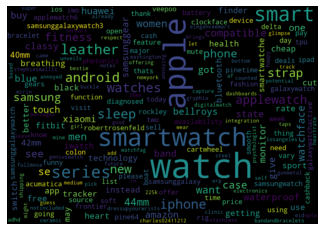

In [45]:
b = 'apple'
wc = WordCloud(width=1000, height=700, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

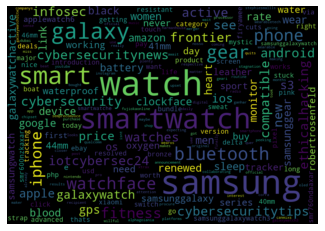

In [46]:
b = 'samsung'
wc = WordCloud(width=1000, height=700, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

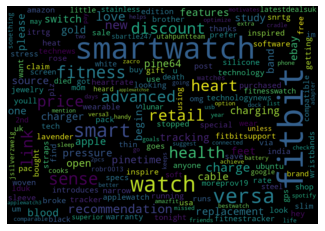

In [48]:
b = 'fitbit'
wc = WordCloud(width=1000, height=700, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

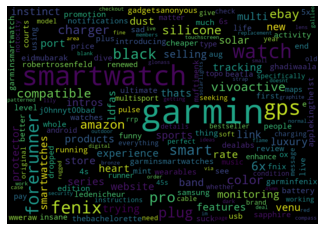

In [49]:
b = 'garmin'
wc = WordCloud(width=1000, height=700, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()